In [31]:
import argparse
import os
import numpy as np
import math
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.utils import save_image
from torch import optim
from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable
import cs231n.datasets.Load_faces as dst
import torch.nn as nn
import torch.nn.functional as F
import torch
import torchvision.transforms as T

In [29]:
dir_path = "C:/Users/wtser/Desktop/learnData/data/faces/"
transform = T.Compose([T.Scale(64),T.ToTensor(),T.Normalize([0.6756,0.5782,0.5534],[0.2733,0.2703,0.2562])])
train_data = dst.load_Face(root =dir_path,number = 2000,transform=transform)
device = torch.device('cuda')
loader_train = DataLoader(train_data,batch_size=32,shuffle=True)

D:\Anaconda\lib\site-packages\torchvision\transforms\transforms.py:208: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [27]:
cuda = True if torch.cuda.is_available() else False

def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

In [24]:
class Generator(nn.Module):
    def __init__(self, indim):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( indim, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d(128,     64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d(    64,      3, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):
        output = self.main(input)
        return output


In [33]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            # input is (nc) x 64 x 64
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 32 x 32
            nn.Conv2d(64, 128 , 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(128 , 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 4 x 4
            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        output = self.main(input)
        return output.view(-1, 1).squeeze(1)


In [43]:
netG = Generator(100).to(device)
netG.apply(weights_init)
netD = Discriminator().to(device)
netD.apply(weights_init)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)

gloass_g:1.0042791366577148,gloss_d:0.5092699527740479,gloss_d_real1.0079374313354492,gloss_d_fake0.010602442547678947
[[[0.26422188 0.20231767 0.33634335]
  [0.19011514 0.2513707  0.34426966]]

 [[0.14669427 0.21992633 0.31305167]
  [0.01264843 0.07958274 0.23649709]]]


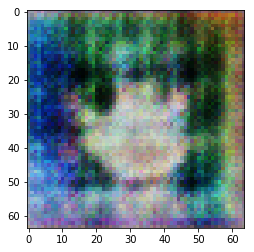

gloass_g:6.540125846862793,gloss_d:0.11592505872249603,gloss_d_real0.1972389817237854,gloss_d_fake0.03461114317178726
[[[ 0.12400318 -0.01647878  0.1796688 ]
  [-0.08354958 -0.26990497  0.08792984]]

 [[ 0.04236336 -0.16511501  0.05461275]
  [-0.01661502 -0.18286768 -0.02218853]]]


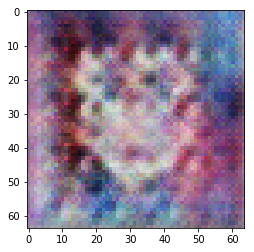

gloass_g:4.782349586486816,gloss_d:0.3787882924079895,gloss_d_real0.7247809767723083,gloss_d_fake0.032795608043670654
[[[ 0.18456611  0.13877094  0.32890832]
  [ 0.04061297 -0.00314961  0.33647496]]

 [[ 0.17843033  0.01966066  0.30829895]
  [-0.02568193  0.16048755  0.36669758]]]


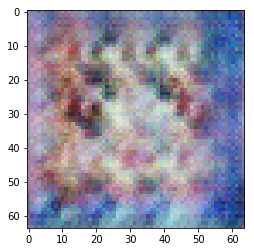

gloass_g:4.5793046951293945,gloss_d:0.48041653633117676,gloss_d_real0.7395334243774414,gloss_d_fake0.2212996780872345
[[[-0.6192476  -0.42602834 -0.57311356]
  [-0.8988576  -0.8633767  -0.8634963 ]]

 [[-0.92383116 -0.7630941  -0.7552601 ]
  [-0.9538261  -0.94187963 -0.9534792 ]]]


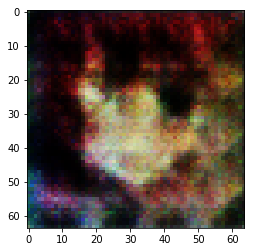

In [47]:
criterion = nn.BCELoss()

fixed_noise = torch.randn(32, 100, 1, 1, device=device)
real_label = 1
fake_label = 0

# setup optimizer
optimizerD = optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))

for epoch in range(2):
    for index, (data,y) in enumerate(loader_train):
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        # train with real
        optimizerD.zero_grad()
        real_cpu = data.to(device)
        batch_size = real_cpu.size(0)
        label = torch.full((batch_size,), real_label, device=device)
        output = netD(real_cpu)
        errD_real = criterion(output, label)
        errD_real.backward()
#         D_x = output.mean().item()

        # train with fake
        noise = torch.randn(data.shape[0], 100, 1, 1, device=device)
        fake = netG(noise)
        label.fill_(fake_label)
        output = netD(fake.detach())
        errD_fake = criterion(output, label)
        errD_fake.backward()
#         D_G_z1 = output.mean().item()
        errD = (errD_real + errD_fake)/2
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        optimizerG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        output = netD(fake)
        errG = criterion(output, label)
        errG.backward()
#         D_G_z2 = output.mean().item()
        optimizerG.step()
        
        if index%60 == 0:
            print('gloass_g:{},gloss_d:{},gloss_d_real{},gloss_d_fake{}'.format(errG,errD,errD_real,errD_fake))
            a = fake[0].cpu()
            img_numpy = a.detach().numpy()
            img_numpy = img_numpy.transpose(1,2,0)
            print(img_numpy[:2,:2])
            plt.imshow(((img_numpy+1.0)/2.0))
            plt.show()